# This experiment is using broadcast input at terminal

In [1]:
import pandas as pd 
import numpy as np
import os      
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
path="C:/Users/Yusuke/Dropbox/Georgia_tech/GT_KIDS/Results/"
Folder_name="Processtime_dynamic_twoport_simulationtime_300s_ver5/"     # First of all, you need to select the folder name !!!!

In [2]:
def Get_Latency(df_algo_time):
    print(df_algo_time.describe())
    sns.set()
    df_algo_time.hist()
    plt.xlabel("Time(s)")
    plt.ylabel("Frequency")
    return df_algo_time.mean()
    
def Get_aggregation(KID1_table, KID3_table, KID7_table, KID9_table, KID11_table,):
    aggre=pd.concat([KID1_table, KID3_table, KID7_table, KID9_table, KID11_table])
    aggre=aggre.sort_index()
    print(aggre.describe())
    aggre.hist()
    return aggre
    
def Get_DetailsOfKID(KID_table):
    sns.set()
    KID_table.plot()
    KID_table.hist()
    print(KID_table.describe())
    
def Get_Elapsed_time(KID_table):
    elapsed_time=[]
    for i in range(len(KID_table)):
        time=KID_table.index[i]-KID_table.index[0]
        elapsed_time.append(time)
    return elapsed_time

def __datetime(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S.%f')

def EpTget(KID_table_datetime):
    
    ElapsedTime=[]
    for i in range(len(KID_table_datetime.index)):
        tmp=__datetime(KID_table_datetime.index[i]) - __datetime(KID_table_datetime.index[0])
        ElapsedTime.append(tmp.total_seconds())
    return ElapsedTime

def Get_allKID(Ipt_Kid1, Ipt_Kid3, Ipt_Kid7, Ipt_Kid9, Ipt_Kid11, column_name):
    a=Ipt_Kid1[column_name]
    a.name=column_name+'_KID1'
    b=Ipt_Kid3[column_name]
    b.name=column_name+'_KID3'
    c=Ipt_Kid7[column_name]
    c.name=column_name+'_KID7'
    d=Ipt_Kid9[column_name]
    d.name=column_name+'_KID9'
    e=Ipt_Kid11[column_name]
    e.name=column_name+'_KID11'
    imash=pd.concat([a,b,c,d,e], axis=1).sort_index()
    imash_itp=imash.interpolate()
    return imash_itp

def MakeElapsedTable(Table):
    ELT=pd.concat([Table.reset_index(), pd.DataFrame(EpTget(Table), columns=['Elapsed time (s)'])], axis=1)
    ELT=ELT.set_index('Elapsed time (s)')
    return ELT

# Reading Data

In [3]:
KID1_table_RR=pd.read_pickle(path+Folder_name+"KID1_RR.pkl")
KID3_table_RR=pd.read_pickle(path+Folder_name+"KID3_RR.pkl")
KID7_table_RR=pd.read_pickle(path+Folder_name+"KID7_RR.pkl")
KID9_table_RR=pd.read_pickle(path+Folder_name+"KID9_RR.pkl")
KID11_table_RR=pd.read_pickle(path+Folder_name+"KID11_RR.pkl")
df_algo_time_RR=pd.read_pickle(path+Folder_name+"df_algo_time_RR.pkl")
KID1_serve_time_RR=pd.read_pickle(path+Folder_name+"KID1_serve_time_RR.pkl")
KID3_serve_time_RR=pd.read_pickle(path+Folder_name+"KID3_serve_time_RR.pkl")
KID7_serve_time_RR=pd.read_pickle(path+Folder_name+"KID7_serve_time_RR.pkl")
KID9_serve_time_RR=pd.read_pickle(path+Folder_name+"KID9_serve_time_RR.pkl")
KID11_serve_time_RR=pd.read_pickle(path+Folder_name+"KID11_serve_time_RR.pkl")

KID1_table_CPUbased=pd.read_pickle(path+Folder_name+"KID1_CPUbased.pkl")
KID3_table_CPUbased=pd.read_pickle(path+Folder_name+"KID3_CPUbased.pkl")
KID7_table_CPUbased=pd.read_pickle(path+Folder_name+"KID7_CPUbased.pkl")
KID9_table_CPUbased=pd.read_pickle(path+Folder_name+"KID9_CPUbased.pkl")
KID11_table_CPUbased=pd.read_pickle(path+Folder_name+"KID11_CPUbased.pkl")
df_algo_time_CPUbased=pd.read_pickle(path+Folder_name+"df_algo_time_CPUbased.pkl")
KID1_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_CPUbased.pkl")
KID3_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_CPUbased.pkl")
KID7_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_CPUbased.pkl")
KID9_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_CPUbased.pkl")
KID11_serve_time_CPUbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_CPUbased.pkl")

KID1_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_Thermalbased.pkl")
KID3_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_Thermalbased.pkl")
KID7_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_Thermalbased.pkl")
KID9_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_Thermalbased.pkl")
KID11_table_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_Thermalbased.pkl")
df_algo_time_Thermalbased=pd.read_pickle(path+Folder_name+"df_algo_time_Thermalbased.pkl")
KID1_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID1_serve_time_Thermalbased.pkl")
KID3_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID3_serve_time_Thermalbased.pkl")
KID7_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID7_serve_time_Thermalbased.pkl")
KID9_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID9_serve_time_Thermalbased.pkl")
KID11_serve_time_Thermalbased=pd.read_pickle(path+Folder_name+"KID11_serve_time_Thermalbased.pkl")

# Each KID servers detail 

          FAN (%)          PS  CPU_utilization  CPU_temperature(degC)
count  985.000000  979.000000       984.000000             987.000000
mean    34.372500   22.593156         5.391331              64.792638
std     17.025114   26.194432         4.303385               4.558463
min     18.820000    0.200000         0.670000              56.750000
25%     26.660000    6.241667         1.400000              61.097222
50%     26.660000   13.100000         4.980000              64.166667
75%     37.630000   24.766667         9.230000              67.013889
max     91.730000   99.800000        14.980000              76.416667


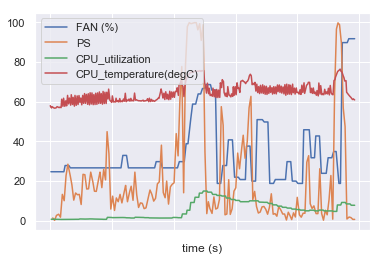

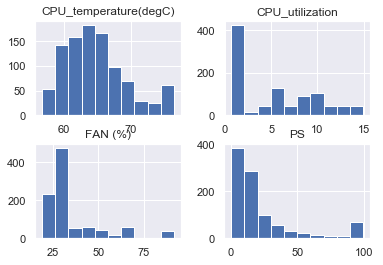

In [4]:
Get_DetailsOfKID(KID1_table_CPUbased)

# Resampling

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



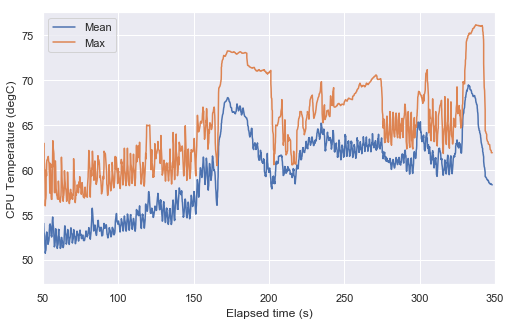

In [5]:
sns.set()
RR=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Mean")
RR.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.xlim(50, 350)
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



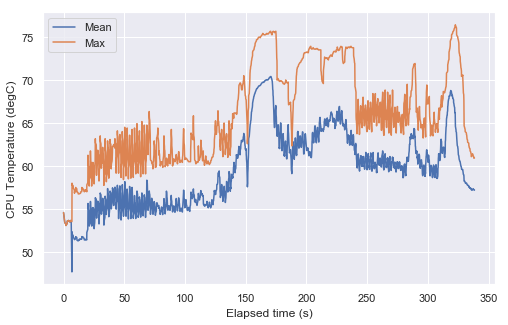

In [6]:
CPU_based=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
CPU_based.mean(axis=1).plot(label="Mean")
CPU_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



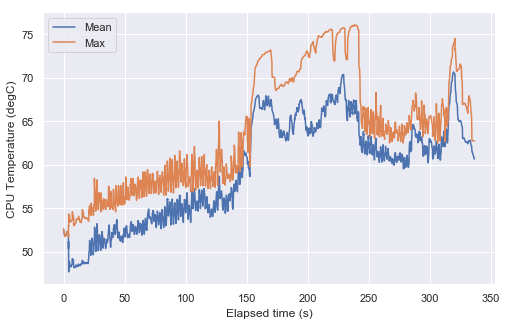

In [7]:
Thermal_based=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'CPU_temperature(degC)'))
plt.figure(figsize=(8.1, 5))
Thermal_based.mean(axis=1).plot(label="Mean")
Thermal_based.max(axis=1).plot(label="Max")
plt.ylabel("CPU Temperature (degC)")
plt.legend()

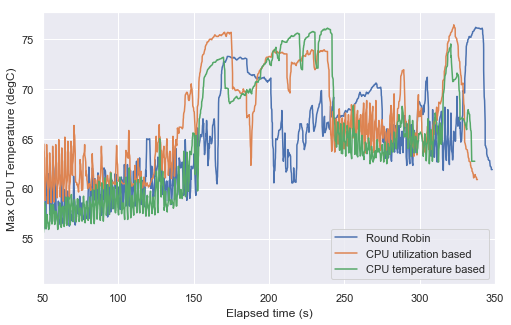

In [8]:
plt.figure(figsize=(8.1, 5))
RR.max(axis=1).plot(label="Round Robin")
CPU_based.max(axis=1).plot(label="CPU utilization based")
Thermal_based.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max CPU Temperature (degC)")
plt.xlim(50, 350)
plt.legend()

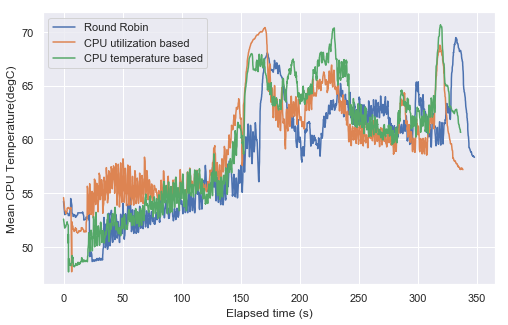

In [9]:
plt.figure(figsize=(8.1, 5))
RR.mean(axis=1).plot(label="Round Robin")
CPU_based.mean(axis=1).plot(label="CPU utilization based")
Thermal_based.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean CPU Temperature(degC)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



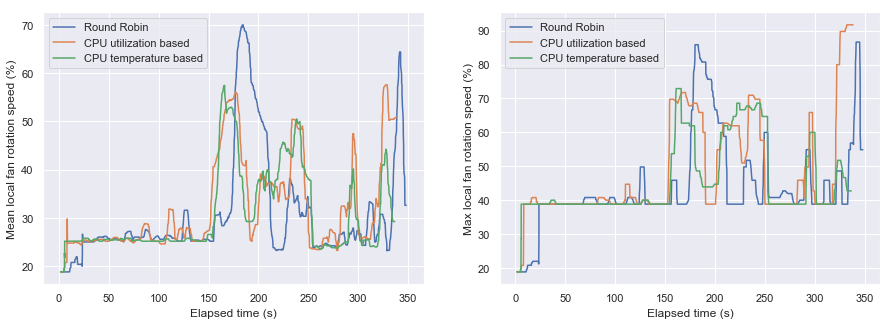

In [10]:
RR_fan=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'FAN (%)'))
CPU_based_fan=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'FAN (%)'))
Thermal_based_fan=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'FAN (%)'))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
RR_fan.mean(axis=1).plot(label="Round Robin")
CPU_based_fan.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Mean local fan rotation speed (%)")
plt.legend()

plt.subplot(1, 2, 2)
RR_fan.max(axis=1).plot(label="Round Robin")
CPU_based_fan.max(axis=1).plot(label="CPU utilization based")
Thermal_based_fan.max(axis=1).plot(label="CPU temperature based")
plt.ylabel("Max local fan rotation speed (%)")
plt.legend()

C:\Users\Yusuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



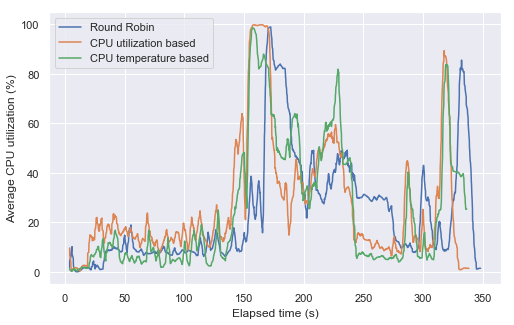

In [11]:
RR_ps=MakeElapsedTable(Get_allKID(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR, 'PS'))
CPU_based_ps=MakeElapsedTable(Get_allKID(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased, 'PS'))
Thermal_based_ps=MakeElapsedTable(Get_allKID(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased, 'PS'))

plt.figure(figsize=(8.1, 5))
RR_ps.mean(axis=1).plot(label="Round Robin")
CPU_based_ps.mean(axis=1).plot(label="CPU utilization based")
Thermal_based_ps.mean(axis=1).plot(label="CPU temperature based")
plt.ylabel("Average CPU utilization (%)")
plt.legend()

# Round Robin Histgram

       Latency (s)
count   299.000000
mean      1.001559
std       0.000747
min       1.000223
25%       1.001227
50%       1.001274
75%       1.001657
max       1.010297


Latency (s)    1.001559
dtype: float64

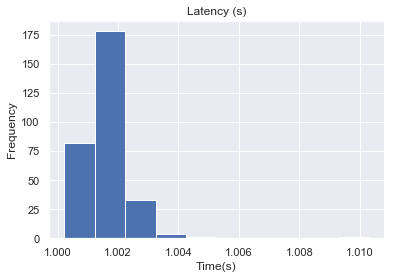

In [12]:
Get_Latency(df_algo_time_RR)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4868.000000  4838.000000      4863.000000            4878.000000
mean     30.710329    23.944626         8.208135              58.630475
std      14.351855    29.649601         9.386521               7.475270
min      18.820000     0.000000         0.000000              36.000000
25%      19.990000     6.820833         1.720000              56.006944
50%      24.305000    11.900000         5.580000              59.416667
75%      38.810000    23.498214        10.265000              62.812500
max      86.630000   100.000000        49.200000              76.166667


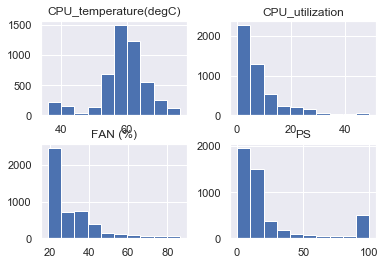

In [13]:
RR_hist=Get_aggregation(KID1_table_RR, KID3_table_RR, KID7_table_RR, KID9_table_RR, KID11_table_RR)

# CPU utilization based 

       Latency (s)
count   299.000000
mean      1.001896
std       0.001037
min       1.000461
25%       1.001430
50%       1.001516
75%       1.001953
max       1.011002


Latency (s)    1.001896
dtype: float64

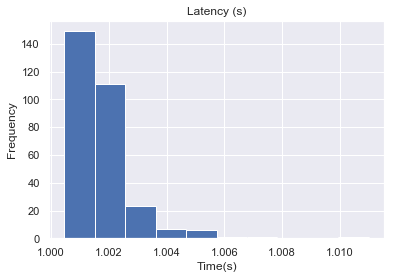

In [14]:
Get_Latency(df_algo_time_CPUbased)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4940.000000  4910.000000      4935.000000            4950.000000
mean     31.877988    26.609420         7.867573              59.561103
std      14.292734    28.439346         6.737964               7.753783
min      18.820000     0.000000         0.370000              40.083333
25%      20.780000     8.800000         2.670000              55.250000
50%      26.660000    15.938095         5.780000              60.458333
75%      38.810000    31.291667        12.200000              64.310764
max      91.730000   100.000000        32.150000              76.416667


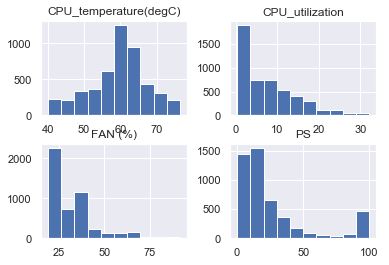

In [15]:
CPU_based_hist=Get_aggregation(KID1_table_CPUbased, KID3_table_CPUbased, KID7_table_CPUbased, KID9_table_CPUbased, KID11_table_CPUbased)

# Thermal based 

       Latency (s)
count   299.000000
mean      1.001938
std       0.001196
min       1.000771
25%       1.001424
50%       1.001501
75%       1.002064
max       1.015924


Latency (s)    1.001938
dtype: float64

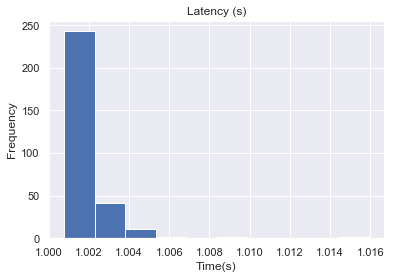

In [16]:
Get_Latency(df_algo_time_Thermalbased)

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4924.000000  4894.000000      4919.000000            4934.000000
mean     30.396961    23.380629         9.072248              59.301209
std      13.011671    33.429170        10.122699               7.158158
min      18.820000     0.100000         0.000000              35.916667
25%      19.990000     2.666667         1.241667              55.500000
50%      24.700000     6.690000         5.250000              59.694444
75%      38.810000    23.485714        13.150000              63.694444
max      72.910000   100.000000        42.180000              76.083333


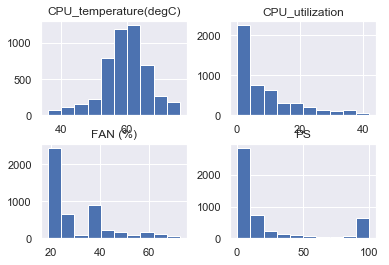

In [17]:
Thermal_based_hist=Get_aggregation(KID1_table_Thermalbased, KID3_table_Thermalbased, KID7_table_Thermalbased, KID9_table_Thermalbased, KID11_table_Thermalbased)

In [18]:
print(RR_hist.describe(), "\n", CPU_based_hist.describe(),"\n", Thermal_based_hist.describe())

           FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4868.000000  4838.000000      4863.000000            4878.000000
mean     30.710329    23.944626         8.208135              58.630475
std      14.351855    29.649601         9.386521               7.475270
min      18.820000     0.000000         0.000000              36.000000
25%      19.990000     6.820833         1.720000              56.006944
50%      24.305000    11.900000         5.580000              59.416667
75%      38.810000    23.498214        10.265000              62.812500
max      86.630000   100.000000        49.200000              76.166667 
            FAN (%)           PS  CPU_utilization  CPU_temperature(degC)
count  4940.000000  4910.000000      4935.000000            4950.000000
mean     31.877988    26.609420         7.867573              59.561103
std      14.292734    28.439346         6.737964               7.753783
min      18.820000     0.000000         0.370000              

In [42]:
table_mean=pd.DataFrame({'Round Robin':RR_hist.mean(), 
               'CPU utilization based':CPU_based_hist.mean(), 
              'CPU temperature based':Thermal_based_hist.mean()})
table_mean.rename(index={'FAN (%)':'Average local fan rotation speed (%)', 'PS':'Average CPU utilization (%)', 
                         'CPU_utilization':'Average system load', 'CPU_temperature(degC)':'Average CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Average local fan rotation speed (%),30.710329,31.877988,30.396961
Average CPU utilization (%),23.944626,26.609420,23.380629
Average system load,8.208135,7.867573,9.072248
Average CPU temperature (degC),58.630475,59.561103,59.301209


In [43]:
table_std=pd.DataFrame({'Round Robin':RR_hist.std(), 
               'CPU utilization based':CPU_based_hist.std(), 
              'CPU temperature based':Thermal_based_hist.std()})
table_std.rename(index={'FAN (%)':'Standard deviation of local fan rotation speed (%)', 'PS':'Standard deviation of average CPU utilization (%)', 
                         'CPU_utilization':'Standard deviation of average system load', 'CPU_temperature(degC)':'Standard deviation of average CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Standard deviation of local fan rotation speed (%),14.351855,14.292734,13.011671
Standard deviation of average CPU utilization (%),29.649601,28.439346,33.429170
Standard deviation of average system load,9.386521,6.737964,10.122699
Standard deviation of average CPU temperature (degC),7.475270,7.753783,7.158158


In [44]:
table_max=pd.DataFrame({'Round Robin':RR_hist.max(), 
               'CPU utilization based':CPU_based_hist.max(), 
              'CPU temperature based':Thermal_based_hist.max()})
table_max.rename(index={'FAN (%)':'Max local fan rotation speed (%)', 'PS':'Max CPU utilization (%)', 
                         'CPU_utilization':'Max system load', 'CPU_temperature(degC)':'Max CPU temperature (degC)'})

,Round Robin,CPU utilization based,CPU temperature based
Max local fan rotation speed (%),86.630000,91.730000,72.910000
Max CPU utilization (%),100.000000,100.000000,100.000000
Max system load,49.200000,32.150000,42.180000
Max CPU temperature (degC),76.166667,76.416667,76.083333


# Histgram evaluation

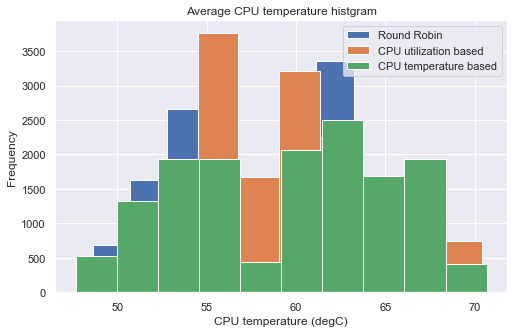

In [19]:
# For mean
hoge=pd.concat([RR.mean(axis=1), CPU_based.mean(axis=1), Thermal_based.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
# Golden ration 1:1.618
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

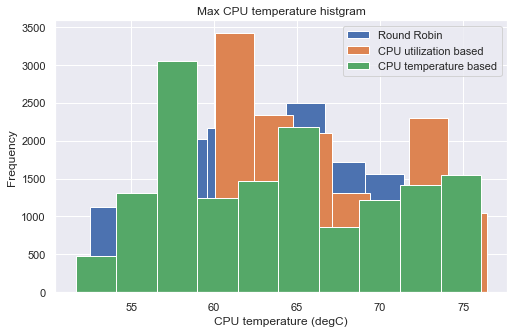

In [20]:
# For max
hoge=pd.concat([RR.max(axis=1), CPU_based.max(axis=1), Thermal_based.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Max CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

In [21]:
print(len(RR_hist), len(CPU_based_hist), len(Thermal_based_hist))

4878 4950 4934


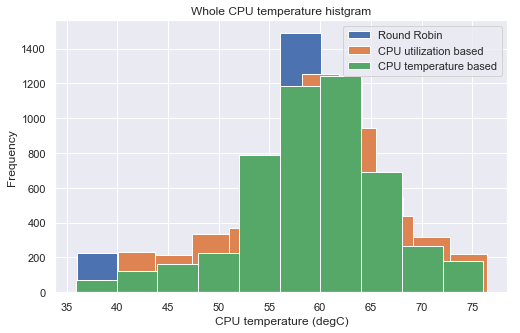

In [22]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['CPU_temperature(degC)'].hist(label="Round Robin")
CPU_based_hist['CPU_temperature(degC)'].hist(label="CPU utilization based")
Thermal_based_hist['CPU_temperature(degC)'].hist(label="CPU temperature based")
plt.title("Whole CPU temperature histgram")
plt.xlabel("CPU temperature (degC)")
plt.ylabel("Frequency")
plt.legend()

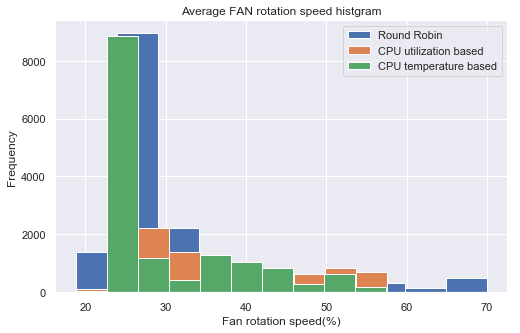

In [23]:
# For mean
hoge=pd.concat([RR_fan.mean(axis=1), CPU_based_fan.mean(axis=1), Thermal_based_fan.mean(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average FAN rotation speed histgram")
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

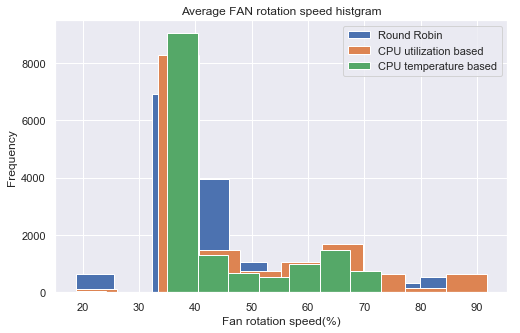

In [24]:
# For max
hoge=pd.concat([RR_fan.max(axis=1), CPU_based_fan.max(axis=1), Thermal_based_fan.max(axis=1)], axis=1).sort_index().interpolate()
hoge.columns=['RR', 'CPU_based', 'Thermal_based']
plt.figure(figsize=(8.1, 5))
hoge['RR'].hist(label="Round Robin")
hoge['CPU_based'].hist(label="CPU utilization based")
hoge['Thermal_based'].hist(label="CPU temperature based")
plt.title("Average FAN rotation speed histgram")
plt.xlabel("Fan rotation speed(%)")
plt.ylabel("Frequency")
plt.legend()

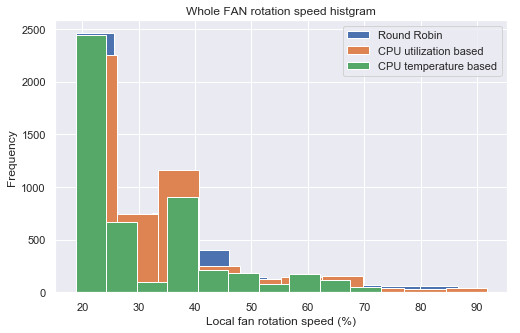

In [26]:
# For all 
""" The problem is that each method has different frequency"""
plt.figure(figsize=(8.1, 5))
RR_hist['FAN (%)'].hist(label="Round Robin")
CPU_based_hist['FAN (%)'].hist(label="CPU utilization based")
Thermal_based_hist['FAN (%)'].hist(label="CPU temperature based")
plt.title("Whole FAN rotation speed histgram")
plt.xlabel("Local fan rotation speed (%)")
plt.ylabel("Frequency")
plt.legend()

# Server Process time evaluation

       Server Processing time (s)
count                  750.000000
mean                     1.633494
std                      3.481573
min                      0.178799
25%                      0.498696
50%                      0.669888
75%                      1.235116
max                     60.797345


,Server Processing time (s)
0,1.193482
0,0.420081
0,0.801319
0,0.600790
0,0.583490
1,0.478377
1,0.468638
1,0.606900
1,0.623326
1,0.485303


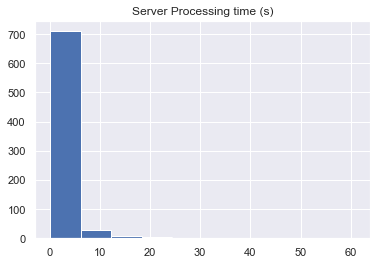

In [27]:
Get_aggregation(KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR)

       Server Processing time (s)
count                  750.000000
mean                     1.274094
std                      2.165931
min                      0.000039
25%                      0.500384
50%                      0.660306
75%                      1.048873
max                     20.580942


,Server Processing time (s)
0,0.434098
0,0.598890
0,1.142755
0,0.585293
0,0.572763
1,0.478048
1,0.594296
1,1.064368
1,0.446271
1,0.640732


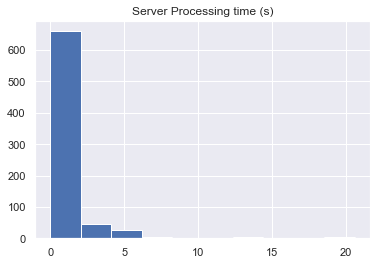

In [28]:
Get_aggregation(KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased)

       Server Processing time (s)
count                  750.000000
mean                     1.861003
std                      3.911782
min                      0.000018
25%                      0.504101
50%                      0.697895
75%                      1.170310
max                     42.611862


,Server Processing time (s)
0,0.613807
0,0.641913
0,0.635525
0,0.592884
0,0.431850
1,0.769952
1,0.599714
1,1.014480
1,0.500105
1,0.450579


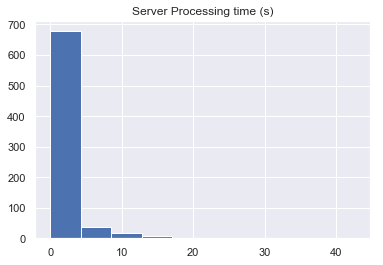

In [29]:
Get_aggregation(KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased)

In [47]:
df_servetime=pd.DataFrame({'Round Robin':
                 pd.concat([KID1_serve_time_RR, KID3_serve_time_RR, KID7_serve_time_RR, KID9_serve_time_RR, KID11_serve_time_RR]).mean(),
                 'CPU Utilization based':
                 pd.concat([KID1_serve_time_CPUbased, KID3_serve_time_CPUbased, KID7_serve_time_CPUbased, KID9_serve_time_CPUbased, KID11_serve_time_CPUbased]).mean(),
                 'CPU temperature based':
                 pd.concat([KID1_serve_time_Thermalbased, KID3_serve_time_Thermalbased, KID7_serve_time_Thermalbased, KID9_serve_time_Thermalbased, KID11_serve_time_Thermalbased]).mean()
                })

df_algotime=pd.DataFrame({'Round Robin':
                 df_algo_time_RR.mean()-1,
                 'CPU Utilization based':
                 df_algo_time_CPUbased.mean()-1,
                 'CPU temperature based':
                 df_algo_time_Thermalbased.mean()-1
                })
table_time=pd.concat([df_algotime, df_servetime])
#table_time.index.names=['Average algorithm latency time (s)', 'Average server processing time (s)']
table_time.rename(index={'Latency (s)':'Average queueing latency time (s)', 'Server Processing time (s)':'Average server processing time (s)'})

,Round Robin,CPU Utilization based,CPU temperature based
Average queueing latency time (s),0.001559,0.001896,0.001938
Average server processing time (s),1.633494,1.274094,1.861003
